# Gradient Descend:
Gradient descent is an optimization algorithm commonly used in machine learning and optimization problems to minimize the loss function or objective function of a model. It is an iterative algorithm that adjusts the parameters of a model in small steps, guided by the gradient of the loss function with respect to those parameters.

1. **Local Minima:** A local minimum of a function is a point where the function value is smaller than at nearby points.
2. **Global Minima:** A global minimum is a point where the function value is smaller than at all other feasible points.

3. **SuddlePoint:** A saddle point is a critical point in a function where the gradient is zero, but it is not an extremum (maximum or minimum). 
    * Some gradients will get the loss up.
    * Some gradients will get the loss down.
    * And that happens more in high dimensional.

1. **Stochastic gradient descent:** batch size=1: In sgd weight update happens after processing each data point , therefore backpropagation takes place after processing each data point. Let n=1000, So batch size=1; iteration=n/batch size=1000

2. **Mini-batch Gradient:** batch size=1<k<n: Suppose, n=1000 mini batch size=k=5 ( k should be: 1 < k < n ), iteration= n/k=200

3. **Batch gradient descent or gradient descent:** batch size= n: N=1000, batch size= 1000, so iteration= n/batch size=1

### Calculate Gradient:
1. ***Numerical Gradient:*** Numerical gradient algorithms are used to approximate the gradients or derivatives of a function when analytical gradients are not available or difficult to compute. These algorithms estimate the gradients by evaluating the function at multiple points and using finite differences to approximate the derivative.

    Numerical gradients can be computationally expensive and less accurate than analytical gradients, especially when the step size is too large or too small. Simply, slow :(, approximate :(, easy to write :)

Algorithm:


In [5]:
import numpy as np

# Define a function
def f(x):
    return x**2 + 2 * np.sin(x)

# Define the points at which to compute the gradient
x = np.array([[-1, 0, 1],[2,3,4]])  # Example points

# Define the step size for finite differences
h = 1e-6

# Compute the gradient numerically using finite differences
gradient = (f(x + h) - f(x - h)) / (2 * h)

# Print the function values and gradient
print("x:", x)
print("Function values:", f(x))
print("Numerical Gradient:", gradient)

x: [[-1  0  1]
 [ 2  3  4]]
Function values: [[-0.68294197  0.          2.68294197]
 [ 5.81859485  9.28224002 14.48639501]]
Numerical Gradient: [[-0.91939539  2.          3.08060461]
 [ 3.16770633  4.02001501  6.69271276]]


2. ***Analytical Gradient:*** An analytical gradient, also known as a closed-form gradient, is the exact mathematical expression of the gradient of a function. It is the derivative of the function with respect to all its input variables, computed analytically using calculus rules.
 fast :), exact :), error-prone :(
$∇f = (∂f/∂x, ∂f/∂y)$


In [4]:
import numpy as np

np.random.seed(1) # keep the orginal array shape

inp_neuron = 3
out_neuron = 1
hidden_neuron = 4

w1 = np.random.rand(inp_neuron, hidden_neuron)
w2 = np.random.rand(hidden_neuron, out_neuron)

def sigmoid(x):
    return 1/(1+np.exp(-x)) # np.exp(m): return An array with exponential of all elements of input array.
        
def analytic_grad(x, y):
        
    global w1, w2
    
    hid = sigmoid(np.matmul(x, w1)) # np.matmul(m1,m2): returns the matrix product of two arrays
    out = np.matmul(hid, w2)
        
    loss = ((y - out)**2)/2
    out_delta = (out - y)
                            
    hid_error = np.matmul(out_delta, w2.T)
    hid_delta = hid_error*hid*(1-hid)
                          
    grad_w2 = np.matmul(hid.T, out_delta)  
    grad_w1 = np.matmul(x.T, hid_delta) 
        
    return grad_w1

def loss(x, y, w1, w2):
                            
    hid = sigmoid(np.matmul(x, w1))
    out = np.matmul(hid, w2)
    loss = ((y - out)**2)/2
    return loss    
    
    
def numeric_grad(x, y):
        
    h = 0.0001
    global w1, w2
    
    w1[0,0] += h
    loss_h = loss(x, y, w1, w2)   # f(a+h)
        
    w1[0,0] -= h
    loss_ = loss(x, y, w1, w2)    # f(a)
        
    grad = (loss_h - loss_)/h     # (f(a+h)-f(a)) / h
    return grad

x = np.array([[1,2,3]])
y = np.array([6])

print("Analytic gradient for weight w1", analytic_grad(x, y))
print("Numeric gradient for weight w1:", numeric_grad(x, y))

Analytic gradient for weight w1 [[-0.10051075 -0.26272135 -0.01630413 -0.12590926]
 [-0.2010215  -0.5254427  -0.03260825 -0.25181852]
 [-0.30153225 -0.78816405 -0.04891238 -0.37772778]]
Numeric gradient for weight w1: [[-0.100507]]


In [2]:
inp_neuron = 3
out_neuron = 1
hidden_neuron = 4

x = np.array([[1,2,3]])
y = np.array([6])

def sigmoid(x):
    return 1/(1+np.exp(-x))

# defining weight matrices
w1 = np.random.rand(inp_neuron, hidden_neuron)
w2 = np.random.rand(hidden_neuron, out_neuron)

# calculating activations
hid = sigmoid(np.matmul(x, w1))    
out = np.matmul(hid, w2)           
        
# defining loss function    
loss = ((y - out)**2)/2

# calculating the gredients of loss w.r.t weights
out_delta = (out - y)                         
hid_error = np.matmul(out_delta, w2.T)
hid_delta = hid_error*hid*(1-hid)                         
grad_w2 = np.matmul(hid.T, out_delta)  
grad_w1 = np.matmul(x.T, hid_delta) 

print("gradients of w1:\n\n", grad_w1)

gradients of w1:

 [[-0.00723209 -0.02216027 -0.0866869  -0.24917071]
 [-0.01446418 -0.04432054 -0.1733738  -0.49834142]
 [-0.02169628 -0.06648081 -0.26006069 -0.74751213]]


# Gradient Descent: `θj := θj - α * ∂J(θ) / ∂θj`
1. `y_pred = w * x + b`
2. `J(w, b) = (1/N) * ∑(y_pred - y)^2`


Algorithm:

        1. Initialize the parameters
        2. Compute the cost function
        3. Compute the gradients
           3.1. Compute the partial derivative of the cost function with respect to w: 
           ∂J/∂w = (2/N) * ∑(y_pred - y) * x
           3.2 Compute the partial derivative of the cost function with respect to b: 
           ∂J/∂b = (2/N) * ∑(y_pred - y)
        4. Update the parameters
                - w := w - α * ∂J/∂w
                - b := b - α * ∂J/∂b
        5. Repeat steps 2-4

In [2]:
import numpy as np
np.random.seed(100)

In [4]:

# Gradient Descent for linear regression
# yhat= wx+b
#loss= (y-yhat)**2/N
#initialize some parameters
N,D=10,2
x= np.random.rand(N,D) # d= R*C
y= 2*x + np.random.rand() # actual value

#parameters
w= np.random.randn(D)
b= 0.00

# hypoparameter
learning_rate=0.01

def descend(x,y,w,b,learning_rate):
    dldw=0.0
    dldb=0.0
    N=x.shape[0]
    for xi, yi in zip(x,y):
        dldw +=-(2*xi.dot(yi-(w.T*xi+b)))
        dldb +=-np.sum(2*(yi-(w.T*xi+b)))

    w= w - learning_rate*(1/N)*dldw #  # in batch gradient descent update happens only one time
    b= b - learning_rate*(1/N)*dldb
    return w,b
        
for epoch in range(4):
    w,b=descend(x,y,w,b,learning_rate)
    yhat=w.T*x+b
    loss=np.divide(np.sum((y-yhat)**2, axis=0), x.shape[0])
    print(f"{epoch}  loss is {loss} parameters w={w} and b={b}")

0  loss is [2.9213031  1.29049464] parameters w=[-0.72572637  0.84707995] and b=0.05446999567408109
1  loss is [2.72053096 1.14602718] parameters w=[-0.69641729  0.87638902] and b=0.10622512905725448
2  loss is [2.53692536 1.01685215] parameters w=[-0.66836192  0.90444439] and b=0.1553970443161712
3  loss is [2.36894637 0.90144519] parameters w=[-0.64150017  0.93130614] and b=0.20211101455571517


### Different Kind of GD with minimal Example

In [6]:
# create a data list
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
height=[167,145,170,180,189,155,163,178,173,176]
weight=[83.5,72.5,85,90,94.5,77.5,81.5,89,86.5,88]
data=pd.DataFrame(list(zip(height,weight)),columns=["height","weight"])
x=data["height"]
y=data["weight"]
data

,height,weight
0,167,83.5
1,145,72.5
2,170,85.0
3,180,90.0
4,189,94.5
5,155,77.5
6,163,81.5
7,178,89.0
8,173,86.5
9,176,88.0


In [8]:
#cost function 
def single_point_cost(x,y,w):   
    y_pred= w * x
    cost=( y_pred - y) **2  #linear regression
    return cost

#grad function
def grad(x,y,w,):
    grad_w=2 * x * ((w * x) - y ) # derevative with respect to x
    return grad_w

#### Batch gradient descent or regular gradient descent
    batch gradient descent update happens only one time.

optimal value w is  0.48597498598079936


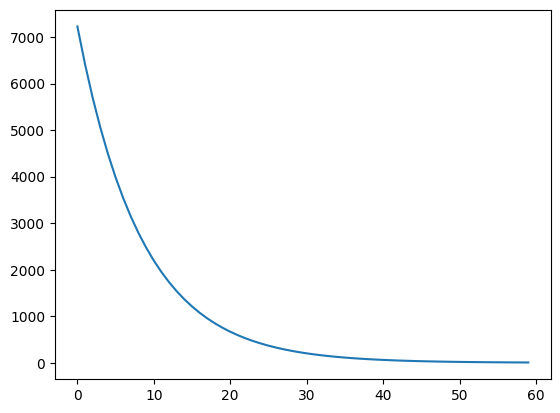

In [9]:
w=0 # here we have  only one parameter
gamma=0.000001 #learning rate
all_costs=[]
for k in range(60):
    cost=0
    for i in range(len(x)):
        a=single_point_cost(x[i],y[i],w)
        cost+=a
    
    cost1=cost/len(x)  #average cost
    all_costs.append(cost1)
    grad_w=0
    for j in range(len(x)):
        b=grad(x[j],y[j],w)
        grad_w+=b
    grad_w1=grad_w/len(x)  #avearge grad
    w= w -  (gamma * grad_w1)  # in batch gradient descent update happens only one time

print("optimal value w is ",w) #optimal value of w
epochs=np.arange(60)
plt.plot(epochs,all_costs)

#### Stochastic gradient descent
- sgd update takes place after every point

Algorithm 8.1: Stochastic Gradient Descent (SGD) update

Inputs:
- Parameters: w (initial parameter vector)
- Learning rate: α (step size)
- Batch: B (randomly sampled mini-batch of training examples)
- Loss function gradient: ∇L(w, x, y) (gradient of the loss function with respect to the parameters w, given input x and target y)

Procedure:
1. Set the gradient accumulation vector g to zero: g = 0
2. For each example (x, y) in the batch B:
    - Compute the gradient of the loss function with respect to the parameters: ∇ = ∇L(w, x, y)
    - Accumulate the gradient: g = g + ∇
3. Update the parameters using the accumulated gradient:
    - w = w - α * (1 / |B|) * g

Output:
- Updated parameter vector w

optimal value w is  0.4999999999999996


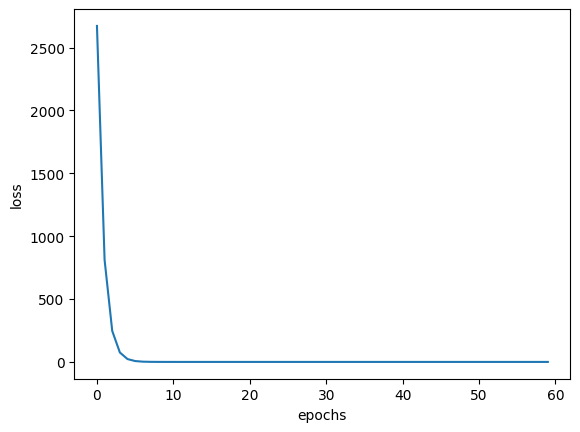

In [10]:
all_costs23=[]
w=0
gamma=0.000001
for k in range(60):
    for i in range(len(x)):
        cost21=single_point_cost(x[i],y[i],w)
        grad_w21=grad(x[i],y[i],w)
        w= w- (gamma * grad_w21) # in sgd update takes place after every point
    all_costs23.append(cost21)

print("optimal value w is ",w) #optimal value of w
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,all_costs23)

#### Mini batch gradient descent
    update takes place after every batch

optimal value w is  0.4999314426019738


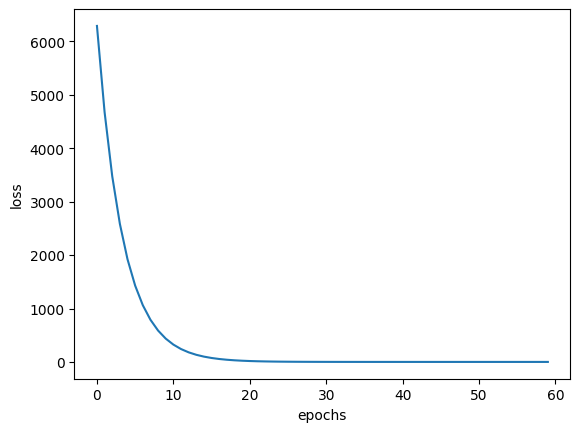

In [13]:
# let our batch size = 5
#so we will have 2 batches because n=10  and updates will happen 2 times 
w=0
gamma=0.000001
batch_size= 5
all_costs41=[]
for k in range(60):
    for j in range(int(len(x)/batch_size)):
        cost4=0
        for i in range(batch_size):
            z1=single_point_cost(x[i],y[i],w)
            cost4+=z1
        if j==1:
            all_costs41.append(cost4/batch_size) #avearge cost of that batch
        grad_w41=0
        for n in range(batch_size):
            f1=grad(x[i],y[i],w)
            grad_w41+=f1
    
        grad_w42=grad_w41/batch_size  #average grad of that function

        w= w- (gamma * grad_w42)  # update takes place after every batch

print("optimal value w is ",w) #optimal value of w
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,all_costs41)

### Comparison all gradients

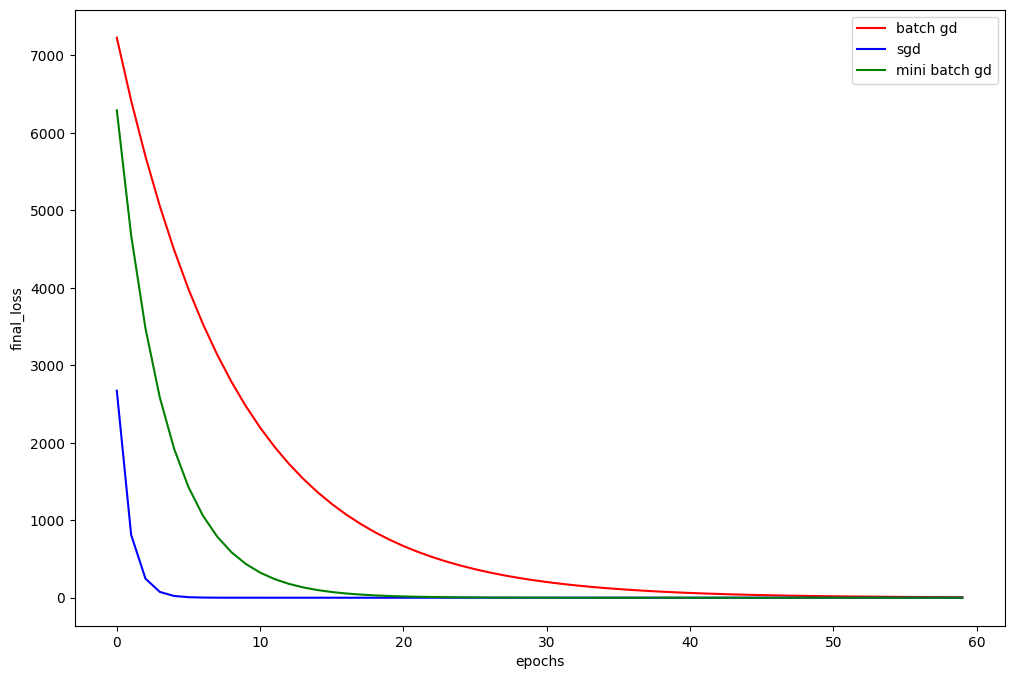

In [14]:
plt.figure(figsize=(12,8))
plt.plot(epochs,all_costs,c='r',label="batch gd")
plt.plot(epochs,all_costs23,c='b',label="sgd")
plt.plot(epochs,all_costs41,c='g',label="mini batch gd")
plt.xlabel("epochs")
plt.ylabel("final_loss")
plt.legend()
plt.show()

## Example with real Data

In [90]:
import random
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta
b,theta=initialize(3)
print("Bias: ",b,"Weights: ",theta)

Bias:  0.025472330267818477 Weights:  [0.66148097 0.09849288 0.58086275]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('../dataset/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [21]:
X=df[['TV','radio','newspaper']]
Y=df['sales']
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
print(X.head())

         TV     radio  newspaper
0  0.967425  0.979066   1.774493
1 -1.194379  1.080097   0.667903
2 -1.512360  1.524637   1.779084
3  0.051919  1.214806   1.283185
4  0.393196 -0.839507   1.278593


In [22]:
import random
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta
b,theta=initialize(3)
print('Bias: ',b,'Weights: ',theta)

Bias:  0.655920614759266 Weights:  [0.49896821 0.1340551  0.63560361]


In [23]:
def predict_Y(b,theta,X):
    return b + np.dot(X,theta)
Y_hat=predict_Y(b,theta,X)
Y_hat[0:10]

array([ 2.39775733,  0.62927738,  1.23647886,  1.66027477,  1.55225104,
        1.38051924,  0.01575034, -0.08633362, -1.20230092,  0.50296306])

In [24]:
import math
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

0.9767079433751067

In [25]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    '''
    x,y : the input and output variable
    y_hat: predicted value with current bias and weights
    b_0,theta_0: current bias and weights
    Learning rate: learning rate to adjust the update step
    '''
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
get_cost(Y,Y_hat)

After initialization -Bias:  0.655920614759266 theta:  [0.49896821 0.1340551  0.63560361]
After first update -Bias:  0.6428022024640807 theta:  [0.50374229 0.13783112 0.62599112]


0.9767079433751067

In [26]:
def run_gradient_descent(X,Y, alpha, num_iterations):
    b,theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for each_iter in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        # print(b, theta)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
            result_idx=result_idx+1
        iter_num +=1
    print(b)
    print("Final Estimate of b and theta : ",b,theta)
    return gd_iterations_df,b,theta
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)
print(gd_iterations_df)

0.5333926789832796
Final Estimate of b and theta :  0.5333926789832796 [0.57500064 0.72406737 0.16976378]
    iteration      cost
0         0.0  1.031564
1        10.0  0.992611
2        20.0  0.955321
3        30.0  0.919620
4        40.0  0.885440
5        50.0  0.852714
6        60.0  0.821379
7        70.0  0.791376
8        80.0  0.762646
9        90.0  0.735134
10      100.0  0.708787
11      110.0  0.683556
12      120.0  0.659392
13      130.0  0.636249
14      140.0  0.614083
15      150.0  0.592852
16      160.0  0.572516
17      170.0  0.553036
18      180.0  0.534376
19      190.0  0.516501


Text(0, 0.5, 'Cost or MSE')

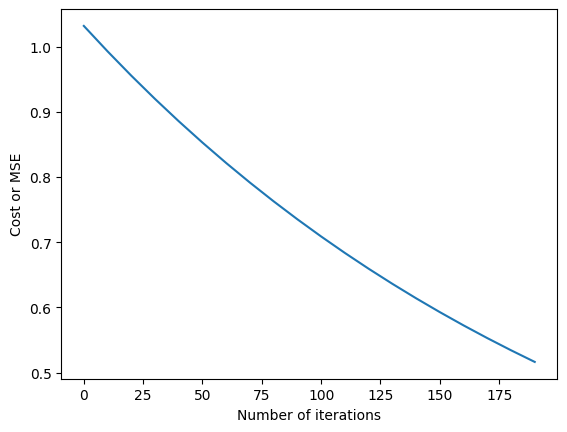

In [27]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost or MSE')

-4.0298443389490436e-17
Final Estimate of b and theta :  -4.0298443389490436e-17 [ 0.75306591  0.53648155 -0.00433069]
0.0012072287941551911
Final Estimate of b and theta :  0.0012072287941551911 [0.74285042 0.48489848 0.05106122]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

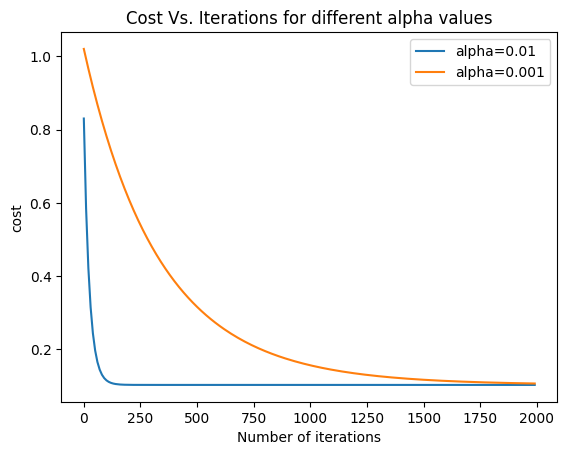

In [28]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label='alpha=0.01')
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label='alpha=0.001')
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')